In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read dataset

In [2]:
import pandas as pd
A=pd.read_csv('C:/Users/dell/Desktop/training_set.csv')

In [3]:
A.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


# Remove statically unimportant columns

In [4]:
A.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
A=A.drop(labels=['Loan_ID'],axis=1)

# Missing data treatment

In [6]:
A.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
for i in A.columns:
    if(A[i].dtypes=='object'):
        t=A[i].mode()[0]
        A[i]=A[i].fillna(t)
    else:
        t=A[i].mean()
        A[i]=A[i].fillna(t)

In [8]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers

In [9]:
cat=[]
con=[]

In [10]:
for i in A.columns:
    if(A[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [12]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
A1=pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [14]:
A1[(A1['ApplicantIncome']>3)|(A1['ApplicantIncome']<-3)]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
126,3.014027,-0.554368,2.662742,0.279851,0.451640
155,5.667392,-0.554368,5.401848,-2.518655,-2.410441
171,7.594669,-0.554368,6.592764,-0.652985,0.451640
183,4.659355,-0.554368,1.352735,0.279851,0.451640
185,5.527810,1.070202,-0.314547,0.279851,0.451640
333,9.490819,-0.554368,4.091841,-2.518655,0.451640
409,12.384520,-0.554368,2.543651,0.279851,-2.410441
443,5.293863,-0.554368,0.066546,0.279851,0.451640


In [15]:
outliers=[]

In [16]:
for i in con:
    outliers.extend(A1[(A1[i]>3)|(A1[i]<-3)].index)

In [17]:
outliers

[126,
 155,
 171,
 183,
 185,
 333,
 409,
 443,
 9,
 177,
 402,
 417,
 581,
 600,
 130,
 155,
 171,
 177,
 278,
 308,
 333,
 369,
 432,
 487,
 506,
 523,
 525,
 561,
 604,
 14,
 68,
 94,
 133,
 242,
 262,
 313,
 495,
 497,
 546,
 575,
 585]

In [18]:
from numpy import unique
out=unique(outliers)

In [19]:
out

array([  9,  14,  68,  94, 126, 130, 133, 155, 171, 177, 183, 185, 242,
       262, 278, 308, 313, 333, 369, 402, 409, 417, 432, 443, 487, 495,
       497, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604])

In [20]:
A=A.drop(index=out,axis=0)

In [21]:
A.shape

(577, 12)

In [22]:
A.index=range(0,577,1)

In [23]:
A.index

RangeIndex(start=0, stop=577, step=1)

# EDA

In [24]:
Y=A[['LoanAmount']]
X=A.drop(labels=['LoanAmount'],axis=1)

In [25]:
cat=[]
con=[]

In [26]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [27]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [28]:
con

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

# Anova

In [29]:
for i in cat:
    eq=str('LoanAmount')+'~'+str(i)
    from statsmodels.formula.api import ols
    model=ols(eq,A).fit()
    from statsmodels.stats.api import anova_lm
    pval=anova_lm(model).iloc[0:1,4:5].values[0][0]
    print('LoanAmount~',i,pval)

LoanAmount~ Gender 0.00011393078888384699
LoanAmount~ Married 6.726601485978352e-05
LoanAmount~ Dependents 0.008630322195418415
LoanAmount~ Education 0.000411065460670111
LoanAmount~ Self_Employed 0.0033620947148734616
LoanAmount~ Property_Area 0.191001021718749
LoanAmount~ Loan_Status 0.3975032611524607


# correlation

In [30]:
A.corr()['LoanAmount']
    

ApplicantIncome      0.442229
CoapplicantIncome    0.309603
LoanAmount           1.000000
Loan_Amount_Term     0.040302
Credit_History       0.006094
Name: LoanAmount, dtype: float64

# Define X and Y

In [31]:
Y=A[['LoanAmount']]

In [32]:
X=A[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome']]

In [33]:
cat=[]
con=[]

In [34]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [35]:
cat

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

In [36]:
con

['ApplicantIncome', 'CoapplicantIncome']

In [37]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x1=pd.DataFrame(mm.fit_transform(X[con]),columns=con)
x2=pd.get_dummies(X[cat])
xnew=x1.join(x2)

In [38]:
xnew.head(2)

,ApplicantIncome,CoapplicantIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.277770,0.000000,0,1,1,0,1,0,0,0,1,0,1,0
1,0.256155,0.167929,0,1,0,1,0,1,0,0,1,0,1,0


# split

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,Y,test_size=0.2,random_state=21)

# BACKWARD ELIMINATION

In [40]:
from statsmodels.api import OLS,add_constant
xconst=add_constant(xtrain)
ols=OLS(ytrain,xconst).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     34.04
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.13e-45
Time:                        10:57:40   Log-Likelihood:                -2397.2
No. Observations:                 461   AIC:                             4814.
Df Residuals:                     451   BIC:                             4856.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     22.6907      1.807     12.556      0.000      19.139      26.242
ApplicantIncome          199.2006     14.743     13.512      0.000     170.227     228.174
CoapplicantIncome        131.7222     12.214     10.784      0.000     107.719     155.726
Gender_Female              7.9896      3.245      2.462      0.014       1.613      14.366
Gender_Male               14.7011      2.828      5.199      0.000       9.144      20.258
Married_No                10.8813      2.709      4.017      0.000       5.558      16.204
Married_Yes               11.8095      2.640      4.473      0.000       6.620      16.999
Dependents_0              -1.9969      3.401     -0.587      0.557      -8.682       4.688
Dependents_1               5.6694      4.538      1.249      0.212      -3.248      14.587
Dependents_2               3.6436      4.525      0.805      0.421      -5.249      12.537
Dependents_3+             15.3747      5.784      2.658      0.008       4.008      26.742
Education_Graduate        15.3636      2.624      5.854      0.000      10.206      20.521
Education_Not Graduate     7.3272      2.746      2.668      0.008       1.930      12.725
Self_Employed_No           8.9327      2.855      3.128      0.002       3.321      14.544
Self_Employed_Yes         13.7581      3.734      3.684      0.000       6.419      21.097
==============================================================================
Omnibus:                       28.472   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.528
Skew:                           0.114   Prob(JB):                     4.91e-21
Kurtosis:                       5.195   Cond. No.                     1.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
ols.rsquared_adj

0.3926324305271487

In [42]:
col_to_del=ols.pvalues.sort_values().index[-1]

# MODEL02

In [43]:
xnew=xnew.drop(labels=col_to_del,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst=add_constant(xtrain)
ols=OLS(ytrain,xconst).fit()
rsq=ols.rsquared_adj
col_to_del=ols.pvalues.sort_values().index[-1]
print(rsq,col_to_del)

0.3926324305271487 Dependents_2


# MODEL03

In [44]:
xnew=xnew.drop(labels=col_to_del,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,Y,test_size=0.2,random_state=21)
from statsmodels.api import add_constant,OLS
xconst=add_constant(xtrain)
ols=OLS(ytrain,xconst).fit()
rsq=ols.rsquared_adj
col_to_del=ols.pvalues.sort_values().index[-1]
print(rsq,col_to_del)

0.39282570513343973 Dependents_1


# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(31.40381916201744, 31.66448565553437)

# Ridge

In [46]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1)
model=rr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(31.74273950512091, 31.877882101697438)

In [47]:
alphas=[]

In [48]:
x=1

In [49]:
for i in range(0,400,1):
    x=x+0.1
    alphas.append(x)

In [50]:
er_tr=[]
er_ts=[]

In [51]:
for i in alphas:
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=i)
    model=rr.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,tr_pred)
    ts_err=mean_absolute_error(ytest,ts_pred)
    er_tr.append(tr_err)
    er_ts.append(ts_err)

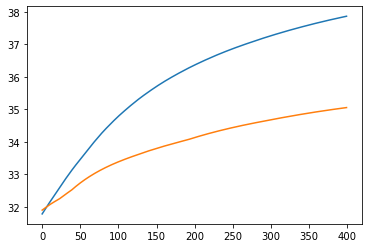

In [52]:
import matplotlib.pyplot as plt
plt.plot(er_tr)
plt.plot(er_ts)

# LASSO

In [53]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.9)
model=ls.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(32.47003628614575, 32.21078808502011)

In [54]:
er_tr=[]
er_ts=[]

In [55]:
for i in alphas:
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=i)
    model=ls.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,tr_pred)
    ts_err=mean_absolute_error(ytest,ts_pred)
    er_tr.append(tr_err)
    er_ts.append(ts_err)

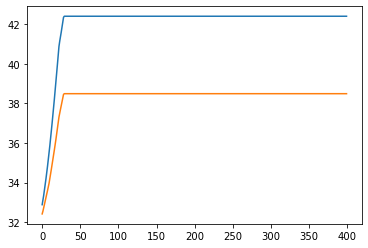

In [56]:
import matplotlib.pyplot as plt
plt.plot(er_tr)
plt.plot(er_ts)

Ridge is the winner model from backward elimination

# DECISION TREE

In [57]:
Y=A[['LoanAmount']]

In [58]:
X=A[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome']]

In [59]:
cat=[]
con=[]

In [60]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [61]:
cat

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

In [62]:
con

['ApplicantIncome', 'CoapplicantIncome']

In [63]:
x1=X[con]
x2=pd.get_dummies(X[cat])
xnew=x1.join(x2)

# split

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xnew,Y,test_size=0.2,random_state=21)

# TREE

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21)
model=dtr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(0.3969631236442516, 45.62703867660765)

# pruning

In [66]:
er_tr=[]
er_ts=[]

In [67]:
for i in range(1,20,1):
    from sklearn.tree import DecisionTreeRegressor
    dtr=DecisionTreeRegressor(random_state=21,max_depth=i)
    model=dtr.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err=mean_absolute_error(ytrain,tr_pred)
    ts_err=mean_absolute_error(ytest,ts_pred)
    er_tr.append(tr_err)
    er_ts.append(ts_err)

In [68]:
import matplotlib.pyplot as plt

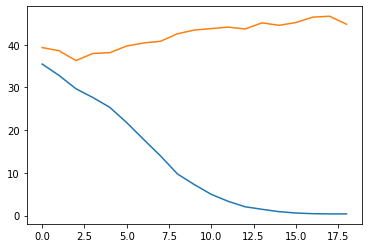

In [69]:
plt.plot(er_tr)
plt.plot(er_ts)

# GRIDSEARCHCV FOR MAX_DEPTH

In [70]:
tg={'max_depth':range(1,20,1)}
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'max_depth': 4}

In [71]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21,max_depth=4)
model=dtr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err
    

(27.650439439872812, 37.97196681148321)

# GRIDSEARCHCV FOR MIN_SAMPLES_SPLIT

In [72]:
tg={'min_samples_split':range(2,40,1)}
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'min_samples_split': 38}

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21,min_samples_split=38)
model=dtr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(26.29316702809277, 36.4270729254362)

# GRIDSEARCHCV FOR MIN_SAMPLES_LEAF

In [74]:
tg={'min_samples_leaf':range(2,40,1)}
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'min_samples_leaf': 14}

In [75]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=21,min_samples_leaf=14)
model=dtr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(26.890939538304902, 36.69821919849128)

in decision tree min_samples_leaf=14 is the winner model.

# RANDOMFOREST

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=21)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(12.242779113169567, 36.286801524430835)

# pruning for max_depth

In [77]:
tg={'max_depth':range(2,20,1),'n_estimators':range(10,200,10)}
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=20,max_depth=5)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(23.969616524130554, 34.88179486006091)

# pruning for min_sampleas_ leaf

In [79]:
tg={'min_samples_leaf':range(4,20,1),'n_estimators':range(10,200,20)}
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'min_samples_leaf': 12, 'n_estimators': 50}

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,min_samples_leaf=12)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(26.656290564131904, 33.369838874130885)

# pruning for minimum samples split

In [81]:
tg={'min_samples_split':range(4,20,1),'n_estimators':range(10,200,20)}
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=21)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'min_samples_split': 19, 'n_estimators': 70}

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=70,min_samples_split=19)
model=rfr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(23.53482099939162, 33.81582913410043)

'min_samples_leaf': 12, 'n_estimators': 50 is the winner model in random forest.

# ADABOOST

In [84]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2,random_state=21)
abr=AdaBoostRegressor(dtr,n_estimators=100)
model=abr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(32.38373326337643, 36.89849379424974)

# GRIDSEARCHCV

In [85]:
tg={'n_estimators':range(20,200,20)}
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor(max_depth=2,random_state=21)
abr=AdaBoostRegressor(dtr)
cv=GridSearchCV(abr,tg,scoring='neg_mean_absolute_error',cv=4)
model=cv.fit(xnew,Y)
model.best_params_

{'n_estimators': 80}

In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2,random_state=21)
abr=AdaBoostRegressor(dtr,n_estimators=80)
model=abr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,tr_pred)
ts_err=mean_absolute_error(ytest,ts_pred)
tr_err,ts_err

(31.95502191609798, 36.203114572400736)

sr.no        model              tr_err      ts_err 
01      linear regression        31.40       31.66
02          ridge                31.74       31.87
03          lasso                32.47       32.21
04        Decision tree          26          36
05        random_forest           26         33
06        adaboost                31         36

In [ ]:
Linear regression is the winner model.

# Linear regression

In [93]:
Y=A[['LoanAmount']]

In [94]:
X=A[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome']]

In [96]:
cat=[]
con=[]

In [97]:
for i in X.columns:
    if(X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=pd.DataFrame(ss.fit_transform(A[con]),columns=con)
x2=pd.get_dummies(X[cat])
xnew=x1.join(x2)

In [47]:
xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [48]:
xnew=xnew.drop(labels=['Dependents_0','Dependents_2'],axis=1)

# test data

In [52]:
B=pd.read_csv('C:/Users/dell/Desktop/testing_set.csv')

In [53]:
C=B[['Loan_ID']]


In [54]:
B=B.drop(labels=['LoanAmount'],axis=1)

In [56]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [57]:
Bnew=B[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome']]

In [58]:
cat=[]
con=[]

In [59]:
for i in Bnew:
    if(B[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [65]:
from sklearn.preprocessing import StandardScaler
B1=pd.DataFrame(ss.transform(B[con]),columns=con)
B2=pd.get_dummies(B[cat])
Bnew=B1.join(B2)

In [66]:
Bnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [68]:
xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

# Linear regression model

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xnew,Y)
ts_pred=model.predict(Bnew)


In [74]:
pred=pd.DataFrame(ts_pred,columns=['pred_LoanAmount'])

In [78]:
pred['LOAN_ID']=C[['Loan_ID']]

In [81]:
pred=pred[['LOAN_ID','pred_LoanAmount']]

In [82]:
pred

,LOAN_ID,pred_LoanAmount
0,LP001015,126.226606
1,LP001022,129.436968
2,LP001031,153.307141
3,LP001035,137.817494
4,LP001051,92.006961
...,...,...
362,LP002971,144.732581
363,LP002975,120.908778
364,LP002980,126.871710
365,LP002986,152.586680


In [83]:
pred.to_csv('C:/Users/dell/Desktop/loan_amount.csv')